# Kaggle Competition

# Titanic: Machine Learning from Disaster

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## 1. Loading the Training Data

In [3]:
df = pd.read_csv('data/train.csv', index_col=0)
display(df.tail())

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
display(df.describe(include='all'))

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Vovk, Mr. Janko",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 2. Pre-process the data

Now the columns need to be transformed to numbers.

### Fast.ai functions
I'm using fast.ai ml1 tutorial, but they have deprecated some of the functions they use at the tutorial.
I'll copy their definitions to be able to use those functions.

Repo: https://github.com/fastai/fasta

In [6]:
from libs.fastai import structured as fas

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
fas.train_cats(df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null category
Sex         891 non-null category
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null category
Fare        891 non-null float64
Cabin       204 non-null category
Embarked    889 non-null category
dtypes: category(5), float64(2), int64(4)
memory usage: 134.3 KB


In [10]:
# missing values
display(df.isnull().sum().sort_index()/len(df))

Age         0.198653
Cabin       0.771044
Embarked    0.002245
Fare        0.000000
Name        0.000000
Parch       0.000000
Pclass      0.000000
Sex         0.000000
SibSp       0.000000
Survived    0.000000
Ticket      0.000000
dtype: float64

In [11]:
import os
os.makedirs('tmp', exist_ok=True)
df.reset_index().to_feather('tmp/titanic')

In [12]:
df, y, nas = fas.proc_df(df, 'Survived')
print(nas)

{'Age': 28.0}


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Pclass      891 non-null int64
Name        891 non-null int16
Sex         891 non-null int8
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null int16
Fare        891 non-null float64
Cabin       891 non-null int16
Embarked    891 non-null int8
Age_na      891 non-null bool
dtypes: bool(1), float64(2), int16(3), int64(3), int8(2)
memory usage: 49.6 KB


## First model
* No split in training set
* Default pre-processing in training data (median in null values, categories to all string columns

In [14]:
m = RandomForestClassifier(n_jobs=-1)
m.fit(df,y)
m.score(df,y)

/mnt/d/WSL/anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9842873176206509

### Predict test set from Kaggle

Now I'll transform test dataset from kaggle to predict answers to submit.

In [15]:
test_kaggle = pd.read_csv('data/test.csv', index_col=0)
test_kaggle.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Categorical columns

Apply same categorical values from training dataset.

In [16]:
# apply same categories from train dataset to test dataset
fas.apply_cats(test_kaggle, df)
test_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


### Filling null values

Fill in the null values with the median obtained from training dataset

In [17]:
test_kaggle, y_pred, _ = fas.proc_df(test_kaggle, na_dict=nas )
print(nas)

{'Age': 28.0}


### Predict and submit to Kaggle

In [18]:
import glob
def predict_submit(m, X_test):
    """ Predicts and save results to csv file"""
    y_pred = m.predict(X_test)
    n = len(glob.glob('data/kaggle-titanic*sub*.csv'))
    submission = pd.DataFrame({'PassengerId':X_test.index,'Survived':y_pred}).set_index('PassengerId')
    sub_filename = f'data/kaggle-titanic-sub{n+1:03}.csv'
    submission.to_csv(sub_filename)
    return submission

In [19]:
m.fit(df,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
submission = predict_submit(m, test_kaggle)
submission.describe()

,Survived
count,418.000000
mean,0.349282
std,0.477315
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### Submission results:

Your submission scored 0.75598, which is not an improvement of your best score. Keep trying!  
Position: 5920

### Base model
Let's try our model again, this time with separate training and validation sets.

### Split train test
Ok, now to test overfitting let's split the train dataset, into train and test.

In [21]:
import math
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(df, y, test_size=0.2, random_state=27)

In [23]:
m = RandomForestClassifier(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

/mnt/d/WSL/anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.09915372244226286, 0.4025061157105039, 0.9901685393258427, 0.8379888268156425]


### Submission results after train/test split

In [24]:
submission = predict_submit(m, test_kaggle)
submission.describe()

,Survived
count,418.000000
mean,0.380383
std,0.486063
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Your submission scored 0.75119, which is not an improvement of your best score. Keep trying!  
  
    
    

### Cross-validation

In [25]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(m, df, y, cv=10))

0.8260631596867551

### Grid Search 

In [27]:
from sklearn.model_selection import GridSearchCV

m = RandomForestClassifier(n_jobs=-1)

param_grid = {'n_estimators':[10,20,30,40,50],
              'min_samples_leaf':np.arange(1,10),
              'oob_score':[False,True],
              'n_jobs':[-1]}
cv = GridSearchCV(m, param_grid, cv=5)

In [ ]:
%time cv.fit(df,y)

In [29]:
cv.best_params_

{'min_samples_leaf': 1, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False}

In [30]:
cv.best_score_

0.8383838383838383

In [31]:
m = RandomForestClassifier(n_estimators=20, n_jobs=-1, oob_score=False, min_samples_leaf=1)
m.fit(X_train, y_train)
print_score(m)

[0.06491134836118732, 0.35057813384887665, 0.9957865168539326, 0.8770949720670391]


### Submission after tuning hyper-parameters

In [32]:
#m.fit(df, y)

submission = predict_submit(m, test_kaggle)
submission.describe()

,Survived
count,418.000000
mean,0.349282
std,0.477315
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Your submission scored 0.74641, which is not an improvement of your best score. Keep trying!

### Feature Importance

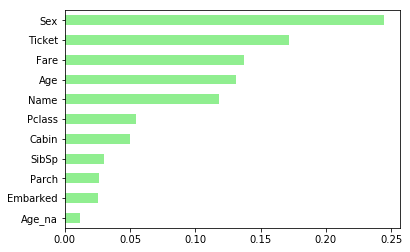

In [33]:
importances_rf = pd.Series(m.feature_importances_, index = df.columns)
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf.plot(kind='barh', color='lightgreen')
plt.show()

### Remove Name column

In [34]:
m = RandomForestClassifier(n_jobs=-1)
m.fit(X_train.drop(['Name'], axis=1),y_train)
m.score(X_valid.drop(['Name'], axis=1),y_valid)


/mnt/d/WSL/anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8435754189944135

In [35]:
submission = predict_submit(m, test_kaggle.drop(['Name'], axis=1))
submission.describe()

,Survived
count,418.000000
mean,0.344498
std,0.475774
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


**Your Best Entry**  
You advanced 661 places on the leaderboard!  
Your submission scored 0.77990, which is an improvement of your previous score of 0.77511. Great job!  
**Position: 5259**

Using sample instead of full dataset to train the model achieved better results.  
Also removing 'Name' column achieves better results.